<a href="https://colab.research.google.com/github/rookasrudzianskas/PytorchModels/blob/master/23_open_source_ML_Model_CUSTOM_DATASETS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

# Note we need pytorch 1.10.0


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [4]:
# Getting a data, my dataset is a subset of food 101 dataset
# Our dataset starts with 3 classes of dood, and only 10% of the images, and 1000 images per class

In [5]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# if the image dfolder does not exis, doewnload and prepare it
if image_path.is_dir():
  print(f"{image_path} already exists, skipping download")
else:
  print(f"{image_path} does not exists create new new one")
  image_path.mkdir(parents=True, exist_ok=True)

  with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak and sushi data...")
    f.write(request.content)

  with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak and sushi dataa")
    zip_ref.extractall(image_path)

data/pizza_steak_sushi does not exists create new new one
Unzipping pizza, steak and sushi dataa


In [6]:
data_path / "pizza_steak_sushi.zip"

PosixPath('data/pizza_steak_sushi.zip')

In [7]:
import os
def walk_through_dir(dir_path):
  """ Walks per dir path, returning it is contents"""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    # For each directory in directory
    print(f"There are {len(dirnames)} directorries and {len(filenames)} images in {dirpath} .")

In [8]:
walk_through_dir(image_path)

There are 2 directorries and 0 images in data/pizza_steak_sushi .
There are 3 directorries and 0 images in data/pizza_steak_sushi/test .
There are 0 directorries and 25 images in data/pizza_steak_sushi/test/pizza .
There are 0 directorries and 31 images in data/pizza_steak_sushi/test/sushi .
There are 0 directorries and 19 images in data/pizza_steak_sushi/test/steak .
There are 3 directorries and 0 images in data/pizza_steak_sushi/train .
There are 0 directorries and 78 images in data/pizza_steak_sushi/train/pizza .
There are 0 directorries and 72 images in data/pizza_steak_sushi/train/sushi .
There are 0 directorries and 75 images in data/pizza_steak_sushi/train/steak .


In [9]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

steak
Rnadom image path data/pizza_steak_sushi/test/steak/296375.jpg
Image class: steak
Image height: 512
Image width: 382


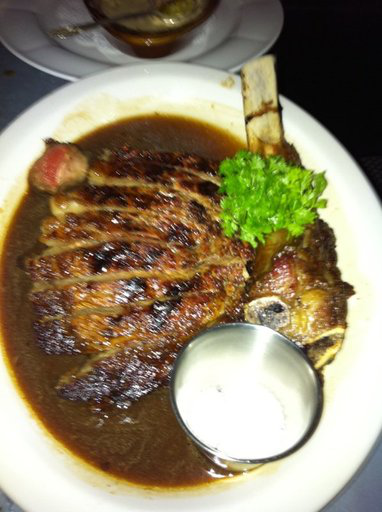

In [10]:
import random
from PIL import Image

random.seed(42)

# Get all image paths
# We want every single path image
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Selelct the random image, and show it here
random_image_path = random.choice(image_path_list)
random_image_path

# Get image class from path name (the image class in the name of the directory where the image is stored)
image_class = random_image_path.parent.stem
print(image_class)

# Open the image with pil

img = Image.open(random_image_path)

# Print metadata
print(f"Rnadom image path {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(-0.5, 381.5, 511.5, -0.5)

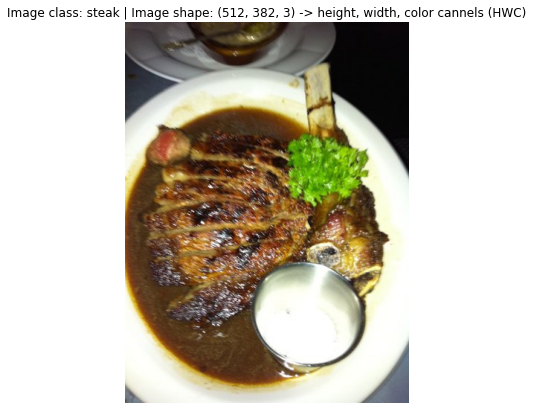

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into the array
img_as_array = np.asarray(img)

# Plot the image with matplot lib 
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> height, width, color cannels (HWC)")
plt.axis(False)

In [12]:
img_as_array

array([[[ 70,  58,  58],
        [ 70,  58,  58],
        [ 70,  58,  58],
        ...,
        [ 11,   6,  10],
        [ 10,   5,   9],
        [ 11,   6,  10]],

       [[ 72,  60,  60],
        [ 72,  60,  60],
        [ 73,  61,  61],
        ...,
        [ 11,   6,  10],
        [ 11,   6,  10],
        [ 11,   6,  10]],

       [[ 73,  62,  60],
        [ 74,  63,  61],
        [ 75,  64,  62],
        ...,
        [ 11,   6,  10],
        [ 11,   6,  10],
        [ 11,   6,  10]],

       ...,

       [[ 72,  72,  70],
        [ 85,  87,  84],
        [ 99, 103, 102],
        ...,
        [ 87,  95, 116],
        [ 86,  94, 115],
        [ 85,  93, 114]],

       [[ 84,  85,  80],
        [ 93,  95,  92],
        [100, 104, 103],
        ...,
        [ 88,  96, 117],
        [ 87,  95, 116],
        [ 85,  93, 114]],

       [[ 94,  95,  90],
        [ 99,  99,  97],
        [101, 103, 102],
        ...,
        [ 90,  98, 119],
        [ 89,  97, 118],
        [ 87,  95, 116]]

In [13]:
# Transforming the data
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Transforming data with torch vision transforms
data_transform = transforms.Compose([
    # Resize the images to 64X64
    transforms.Resize(size=(64, 64)),
    # Flip the image randomly horrizontally
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into torch tensor
    transforms.ToTensor()
])

In [14]:
data_transform(img)

tensor([[[0.0431, 0.0431, 0.0431,  ..., 0.2627, 0.2784, 0.2980],
         [0.0392, 0.0392, 0.0392,  ..., 0.2549, 0.2627, 0.2824],
         [0.0314, 0.0314, 0.0275,  ..., 0.2745, 0.2706, 0.2745],
         ...,
         [0.3765, 0.3843, 0.3961,  ..., 0.9294, 0.8196, 0.6275],
         [0.3608, 0.3725, 0.3843,  ..., 0.7412, 0.5176, 0.4627],
         [0.3529, 0.3647, 0.3725,  ..., 0.5059, 0.4314, 0.4157]],

        [[0.0235, 0.0235, 0.0235,  ..., 0.2275, 0.2392, 0.2549],
         [0.0235, 0.0235, 0.0235,  ..., 0.2196, 0.2235, 0.2431],
         [0.0196, 0.0235, 0.0196,  ..., 0.2392, 0.2392, 0.2392],
         ...,
         [0.4000, 0.4118, 0.4196,  ..., 0.9255, 0.8157, 0.6275],
         [0.3882, 0.3961, 0.4039,  ..., 0.7333, 0.5176, 0.4745],
         [0.3804, 0.3882, 0.3922,  ..., 0.5255, 0.4667, 0.4353]],

        [[0.0392, 0.0392, 0.0392,  ..., 0.2431, 0.2392, 0.2431],
         [0.0392, 0.0353, 0.0353,  ..., 0.2392, 0.2353, 0.2392],
         [0.0314, 0.0353, 0.0314,  ..., 0.2549, 0.2471, 0.

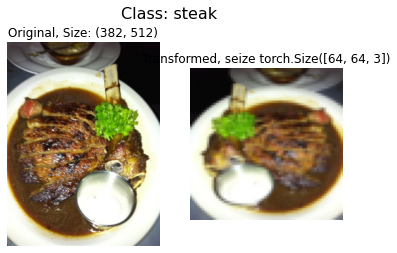

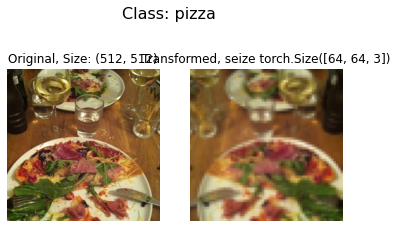

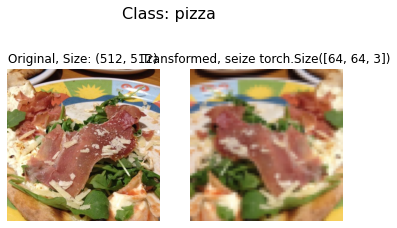

In [15]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
  """ Selects the random images from a path of images, and loads/transforms then plots the original versus transformed version"""
  if seed:
    random.seed(seed) 
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original, Size: {f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      # permute changes the C, H, W to H, W, C
      transformed_image = transform(f).permute(1, 2, 0) # note we will need to change the shape for matplotlib
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed, seize {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list, transform=data_transform, n=3, seed=42)

In [16]:
image_path_list

[PosixPath('data/pizza_steak_sushi/test/pizza/3475871.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/344397.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2124579.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/416067.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2236338.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/540882.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2218680.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/971934.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/195160.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2871261.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/3092704.jpg'),
 PosixPath('data/pizza_steak_

In [17]:
# Loading image data using image folder
# Use image folder to create datasets
from torchvision import datasets
# The image will have the folder name
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform, target_transform=None) #transform for the data, transform for the label
# We do not need to transform the labels as well
# for the test data
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)

train_data, test_data


(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ), Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [18]:
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [19]:
# Get classnames as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [20]:
# Get classnames as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [21]:
# Check the lengs of out dataset
len(train_data), len(test_data)

(225, 75)

In [22]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [23]:
# Index on the train_data dataset to get a single image and label
train_data[0]

(tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
          [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
          [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
          ...,
          [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],
 
         [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
          [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
          [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
          ...,
          [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
          [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
          [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],
 
         [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
          [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
          [0.0902, 0.0902, 0.0902,  ...,

In [24]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor: \n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")
img, label

Image tensor: 
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.

(tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
          [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
          [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
          ...,
          [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],
 
         [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
          [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
          [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
          ...,
          [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
          [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
          [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],
 
         [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
          [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
          [0.0902, 0.0902, 0.0902,  ...,

In [25]:
label

0

In [26]:
class_names[label]

'pizza'

Original shape: torch.Size([3, 64, 64]) -> color channels, height, width
Image permute: torch.Size([64, 64, 3]) -> height, width, color_channels


Text(0.5, 1.0, 'pizza')

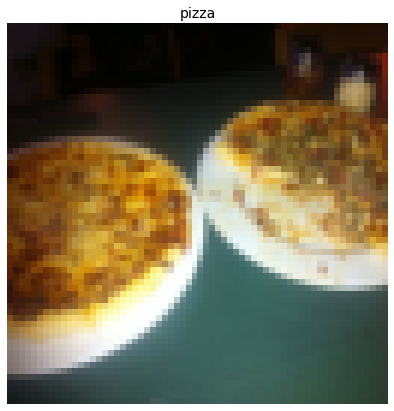

In [27]:
# Rearange the order od dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes
print(f"Original shape: {img.shape} -> color channels, height, width")
print(f"Image permute: {img_permute.shape} -> height, width, color_channels")

# Plote the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

In [28]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [29]:
# Turn train and test datasets into dataloaders
import os
from torch.utils.data import DataLoader

os.cpu_count()

BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, num_workers=1, shuffle=True)

test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, num_workers=1, shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f5d1093d590>,
 <torch.utils.data.dataloader.DataLoader at 0x7f5d1093d550>)

In [30]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [31]:
len(train_data), len(test_data)

(225, 75)

In [32]:
225 / 32

7.03125

In [40]:
img, label = next(iter(train_dataloader))

# Print batch size, now it will be 1, you can change the bathsize to anything you want
print(f"Image shape: {img.shape} -> bath_size, color channels, height, width")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> bath_size, color channels, height, width
Label shape: torch.Size([1])


In [43]:
# Option 2, loading image data with a custom dataset
import os
import pathlib
import torch
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List



In [44]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [50]:
# Creating a helper function to get class names
# Setup the path for target directory
target_directory = train_dir
print(f"Target dir: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [51]:
list(os.scandir(target_directory))

[<DirEntry 'pizza'>, <DirEntry 'sushi'>, <DirEntry 'steak'>]

In [56]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """ Find the class folder names in a target direcotyr"""
  # Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # Raise an erro if class names cannot be find
  if not classes:
    return FileNotFoundError(f"Could not find any classes in directory: {directory}... please check the file structure")

  # Create a dic of idexed labels
  # Map a class to integrer, go throug this and map to index, 1 pizza and tt
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx

In [58]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [59]:
# Create a custom dataset to replicate ImageFolder
